In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

### **ML Algorithms: LR, RF, DT, NB, SVM, GB, MLP, KNN, XGBoost**

### **Import Libraries**

In [ ]:
import pandas as pd #Read file
import numpy as np #Matrix multiplication
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/Heart Disease/balanced_data_20K.csv', sep=',')

In [ ]:
df.shape

(20000, 12)

In [ ]:
df.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,62,2,172,93.0,120,80,1,1,0,0,1,1
1,40,1,162,56.0,120,80,1,1,0,0,1,1
2,60,2,170,68.0,130,80,1,1,0,0,0,1
3,56,2,173,76.0,130,80,1,3,1,0,1,0
4,46,1,156,69.0,100,70,1,1,0,0,1,0
5,42,2,175,71.0,120,90,1,1,0,0,1,0
6,62,1,168,93.0,120,90,1,2,0,0,1,1
7,58,1,166,82.0,120,80,1,1,0,0,1,1
8,44,1,167,67.0,130,90,3,1,0,0,1,0
9,56,1,158,120.0,140,90,3,1,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          20000 non-null  int64  
 1   gender       20000 non-null  int64  
 2   height       20000 non-null  int64  
 3   weight       20000 non-null  float64
 4   ap_hi        20000 non-null  int64  
 5   ap_lo        20000 non-null  int64  
 6   cholesterol  20000 non-null  int64  
 7   gluc         20000 non-null  int64  
 8   smoke        20000 non-null  int64  
 9   alco         20000 non-null  int64  
 10  active       20000 non-null  int64  
 11  cardio       20000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 1.8 MB


In [ ]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000
mean,53.324650,1.356400,164.352050,74.544747,129.313300,98.129100,1.37935,1.241550,0.09315,0.058300,0.796300,0.500000
std,6.812964,0.478947,8.356177,14.772143,168.642916,204.668699,0.68452,0.586874,0.29065,0.234316,0.402759,0.500013
min,30.000000,1.000000,55.000000,23.000000,-150.000000,-70.000000,1.00000,1.000000,0.00000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.00000,1.000000,0.00000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.00000,1.000000,0.00000,0.000000,1.000000,0.500000
75%,58.000000,2.000000,170.000000,83.000000,140.000000,90.000000,2.00000,1.000000,0.00000,0.000000,1.000000,1.000000
max,65.000000,2.000000,198.000000,200.000000,14020.000000,10000.000000,3.00000,3.000000,1.00000,1.000000,1.000000,1.000000


**Info Of Dataset**

In [ ]:
df.isnull().values.any() #IF there any null value reture True otherwise false

False

In [ ]:
df.duplicated().values.any()

False

In [ ]:
correlation=df.corr()
correlation

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.023033,-0.079379,0.045865,0.007131,0.013996,0.150233,0.104556,-0.046332,-0.034346,-0.012307,0.224086
gender,-0.023033,1.000000,0.502810,0.147074,0.014469,0.012591,-0.047891,-0.029489,0.340529,0.163269,0.006992,-0.001879
height,-0.079379,0.502810,1.000000,0.292765,0.007409,0.001884,-0.052468,-0.024050,0.185953,0.092460,-0.011080,-0.015671
weight,0.045865,0.147074,0.292765,1.000000,0.028147,0.035100,0.122738,0.104231,0.063113,0.055951,-0.018366,0.168669
ap_hi,0.007131,0.014469,0.007409,0.028147,1.000000,0.013047,0.026167,0.011514,-0.001566,-0.000923,0.007849,0.056740
ap_lo,0.013996,0.012591,0.001884,0.035100,0.013047,1.000000,0.016591,0.003194,0.004550,0.014172,0.017827,0.063050
cholesterol,0.150233,-0.047891,-0.052468,0.122738,0.026167,0.016591,1.000000,0.449378,-0.003953,0.030763,0.025840,0.214097
gluc,0.104556,-0.029489,-0.024050,0.104231,0.011514,0.003194,0.449378,1.000000,-0.011142,0.010673,0.000016,0.090737
smoke,-0.046332,0.340529,0.185953,0.063113,-0.001566,0.004550,-0.003953,-0.011142,1.000000,0.342426,0.030538,-0.028729
alco,-0.034346,0.163269,0.092460,0.055951,-0.000923,0.014172,0.030763,0.010673,0.342426,1.000000,0.029414,-0.019632


<Axes: >

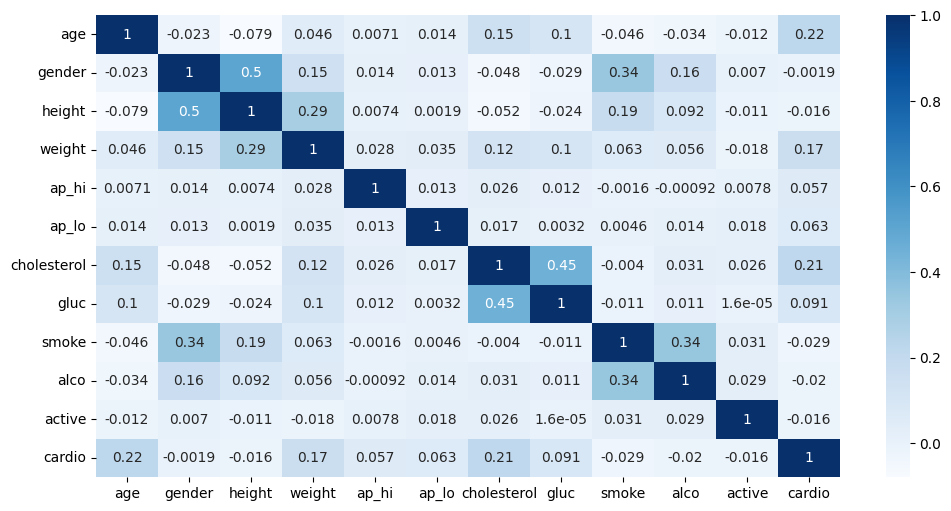

In [ ]:
#heatmap
plt.figure(figsize=(12,6))
sns.heatmap(correlation, cmap="Blues", annot=True)

Text(0.5, 1.0, 'Correlation of numerical attributes with cardio')

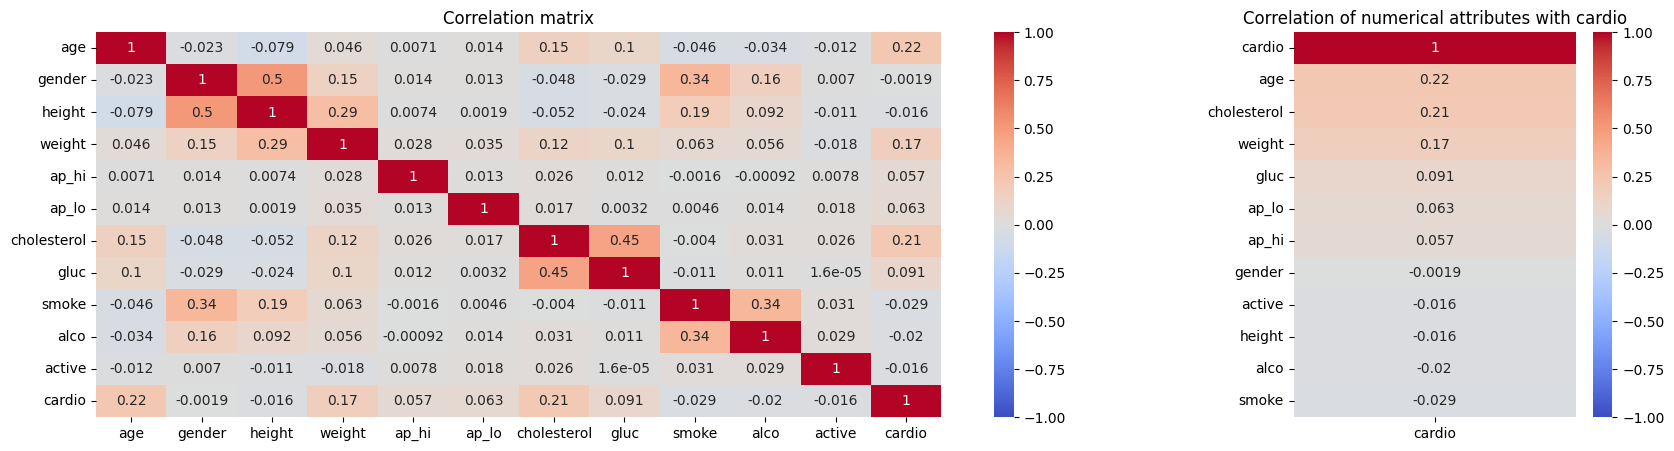

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(20, 5), width_ratios=[3, 1])

sns.heatmap(data=df.corr(method="pearson", numeric_only=True), vmin=-1, vmax=1, annot=True,cmap='coolwarm', ax=axs[0])
axs[0].set_title("Correlation matrix")

sns.heatmap(data=df.corr(method="pearson", numeric_only=True)[["cardio"]].sort_values('cardio', ascending=False), vmin=-1, vmax=1, annot=True,cmap='coolwarm', ax=axs[1])
axs[1].set_title("Correlation of numerical attributes with cardio")

In [ ]:
# 1 - women, 2 - men
gender_variable = 'gender'

# Calculate the number of male patients
male_patients = df[df[gender_variable] == 2].shape[0]
female_patients = df[df[gender_variable] == 1].shape[0]
print(f'Number of male patients: {male_patients}')
print(f'Number of female patients: {female_patients}')


target_variable = 'cardio'
healthy_patients = df[df[target_variable] == 0].shape[0]
print(f'Number of healthy patients: {healthy_patients}')
disease = 66184 - healthy_patients
print(f'Number of unhealhty: {disease}')



# Calculate the number of male healthy patients
male_healthy_patients = df[(df[target_variable] == 0) & (df[gender_variable] == 2)].shape[0]
print(f'Number of male healthy patients: {male_healthy_patients}')

# Calculate the number of female healthy patients
female_healthy_patients = df[(df[target_variable] == 0) & (df[gender_variable] == 1)].shape[0]
print(f'Number of female healthy patients: {female_healthy_patients}')


# Unhealthy patient male
male_unhealthy_patients = df[(df[target_variable] == 1) & (df[gender_variable] == 2)].shape[0]
print(f'Male unhealthy (having heart disease) patients: {male_unhealthy_patients}')


# Calculate the number of female unhealthy patients
female_unhealthy_patients = df[(df[target_variable] == 1) & (df[gender_variable] == 1)].shape[0]
print(f'Female unhealthy (having heart disease) patients: {female_unhealthy_patients}')

Number of male patients: 7128
Number of female patients: 12872
Number of healthy patients: 10000
Number of unhealhty: 56184
Number of male healthy patients: 3573
Number of female healthy patients: 6427
Male unhealthy (having heart disease) patients: 3555
Female unhealthy (having heart disease) patients: 6445


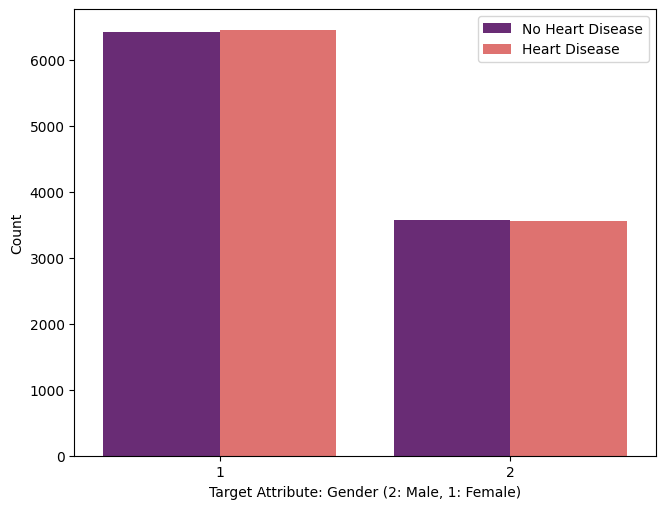

In [ ]:
target_variable = 'cardio'

# Assuming the gender variable is named 'gender' where 1 represents male
gender_variable = 'gender'

# Create a count plot to visualize the distribution of individuals with and without heart disease based on gender
plt.figure(figsize=(7.5, 5.8))
sns.countplot(x=gender_variable, hue=target_variable, data=df, palette='magma')
plt.xlabel('Target Attribute: Gender (2: Male, 1: Female)')
plt.ylabel('Count')
plt.legend( labels=['No Heart Disease', 'Heart Disease'])
plt.show()


In [ ]:
# normal attribute and class attribute feature alada korar jonno
X=df.drop(columns='cardio',axis=1)
Y=df['cardio']

In [ ]:
X

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,62,2,172,93.0,120,80,1,1,0,0,1
1,40,1,162,56.0,120,80,1,1,0,0,1
2,60,2,170,68.0,130,80,1,1,0,0,0
3,56,2,173,76.0,130,80,1,3,1,0,1
4,46,1,156,69.0,100,70,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
19995,62,1,158,54.0,110,70,1,1,0,0,1
19996,60,1,159,75.0,130,80,3,1,0,0,1
19997,60,2,120,80.0,120,80,1,1,0,0,1
19998,60,1,156,73.0,110,70,3,1,0,0,0


In [ ]:
Y

0        1
1        1
2        1
3        0
4        0
        ..
19995    0
19996    1
19997    1
19998    1
19999    1
Name: cardio, Length: 20000, dtype: int64

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit_transform(X)
x = pd.DataFrame(scaler, columns=X.columns)
x.describe().T.style.background_gradient(axis=0, cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
age,20000.000000,0.666419,0.194656,0.000000,0.514286,0.685714,0.800000,1.000000
gender,20000.000000,0.356400,0.478947,0.000000,0.000000,0.000000,1.000000,1.000000
height,20000.000000,0.764700,0.058435,0.000000,0.727273,0.769231,0.804196,1.000000
weight,20000.000000,0.291213,0.083458,0.000000,0.237288,0.276836,0.338983,1.000000
ap_hi,20000.000000,0.019712,0.011901,0.000000,0.019054,0.019054,0.020466,1.000000
ap_lo,20000.000000,0.016696,0.020325,0.000000,0.014896,0.014896,0.015889,1.000000
cholesterol,20000.000000,0.189675,0.342260,0.000000,0.000000,0.000000,0.500000,1.000000
gluc,20000.000000,0.120775,0.293437,0.000000,0.000000,0.000000,0.000000,1.000000
smoke,20000.000000,0.093150,0.290650,0.000000,0.000000,0.000000,0.000000,1.000000
alco,20000.000000,0.058300,0.234316,0.000000,0.000000,0.000000,0.000000,1.000000


## Splitting a dataset into 90% training and 10% testing sets

In [ ]:
# One will use for train and one will use for testing
x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size = 0.1, random_state=0, stratify=Y)

In [ ]:
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [ ]:
y_train.value_counts()

1    9000
0    9000
Name: cardio, dtype: int64

**RF**

In [ ]:
param_grid_rf = {
'n_estimators': [50, 100],  # Reduced number of estimators
    'max_depth': [5],  # Increased max_depth or set it to a specific value
    'min_samples_split': [2, 5, 10],  # Increased min_samples_split
    'min_samples_leaf': [1],  # Increased min_samples_leaf
    'max_features': ['auto', 'sqrt', 0.5],
    'random_state': [0]
}
rf = RandomForestClassifier()
rf_clf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, scoring='accuracy')
rf_clf.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5],
                         'max_features': ['auto', 'sqrt', 0.5],
                         'min_samples_leaf': [1],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100], 'random_state': [0]},
             scoring='accuracy')

In [ ]:
rf_pred = rf_clf.predict(x_test) # Make predictions on the test data

In [ ]:
print("Random Forest Accuracy:",accuracy_score(y_test,rf_pred))
print("Random Forest Precision:",precision_score(y_test,rf_pred))
print("Random Forest Recall:",recall_score(y_test,rf_pred))
print("Random Forest F1 Score:",f1_score(y_test,rf_pred))
print("Random Forest Confusion Matrix:",confusion_matrix(y_test,rf_pred))

Random Forest Accuracy: 0.732
Random Forest Precision: 0.7703962703962703
Random Forest Recall: 0.661
Random Forest F1 Score: 0.7115177610333693
Random Forest Confusion Matrix: [[803 197]
 [339 661]]


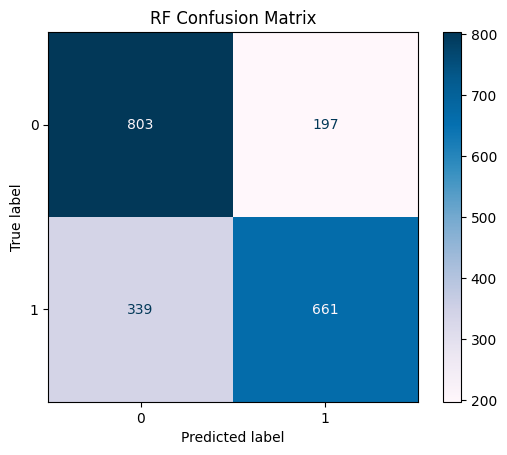

In [ ]:
#confusion matrix using matplotlib
rf_cm = confusion_matrix(y_test,rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=rf_clf.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('RF Confusion Matrix')
plt.show()

**DT**

In [ ]:
dc_clf = DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=2)
dc_clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5)

In [ ]:
dc_pred = dc_clf.predict(x_test) # Make predictions on the test data

In [ ]:
print("Decision Tree Accuracy:", accuracy_score(y_test,dc_pred))
print("Decision Tree Precision:",precision_score(y_test,dc_pred))
print("Decision Tree Recall:",recall_score(y_test,dc_pred))
print("Decision Tree F1 Score:",f1_score(y_test,dc_pred))
print("Decision Tree Confusion Matrix:", confusion_matrix(y_test,dc_pred))

Decision Tree Accuracy: 0.732
Decision Tree Precision: 0.7697674418604651
Decision Tree Recall: 0.662
Decision Tree F1 Score: 0.7118279569892473
Decision Tree Confusion Matrix: [[802 198]
 [338 662]]


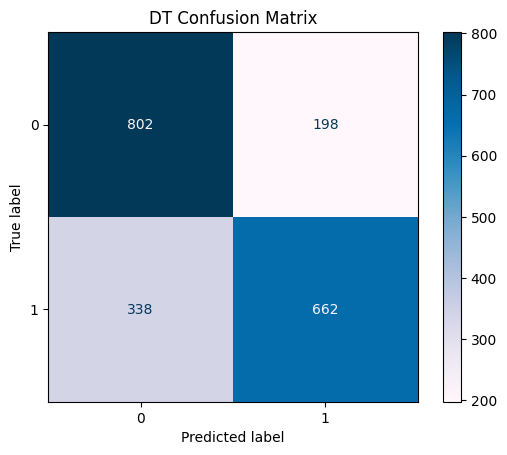

In [ ]:
#confusion matrix using matplotlib
dc_cm = confusion_matrix(y_test,dc_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=dc_cm, display_labels=dc_clf.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('DT Confusion Matrix')
plt.show()

**NB**

In [ ]:
nb_clf = GaussianNB()
nb_clf.fit(x_train,y_train)

GaussianNB()

In [ ]:
nb_pred = nb_clf.predict(x_test)

In [ ]:
print("Naive Bayes Accuracy:", accuracy_score(y_test,nb_pred))
print("Naive Bayes Precision:", precision_score(y_test,nb_pred))
print("Naive Bayes Recall:", recall_score(y_test,nb_pred))
print("Naive Bayes F1 Score:", f1_score(y_test,nb_pred))
print("Naive Bayes Confusion Matrix:", confusion_matrix(y_test,nb_pred))

Naive Bayes Accuracy: 0.577
Naive Bayes Precision: 0.7452229299363057
Naive Bayes Recall: 0.234
Naive Bayes F1 Score: 0.35616438356164387
Naive Bayes Confusion Matrix: [[920  80]
 [766 234]]


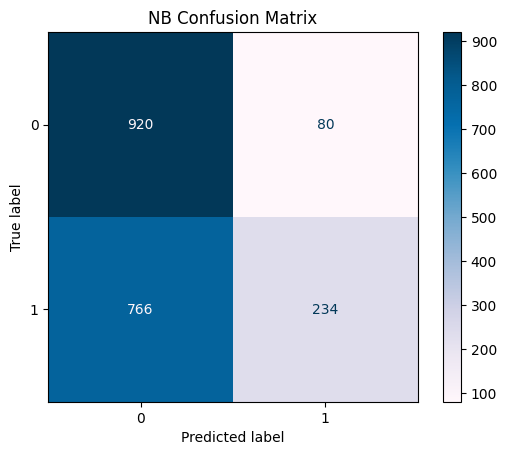

In [ ]:
#confusion matrix using matplotlib
nb_cm = confusion_matrix(y_test,nb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=nb_cm, display_labels=nb_clf.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('NB Confusion Matrix')
plt.show()

**Logistic Regression**


In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter':[100,1000,10000]
}
logreg = LogisticRegression()
model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, n_jobs=-1)
model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 1000, 10000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']})

In [ ]:
anss=model.predict(x_test)
accuracy_test_lr=accuracy_score(anss,y_test)
precision_test_lr=precision_score(anss,y_test)
recall_test_lr=recall_score(anss,y_test)
f1_test_lr=f1_score(anss,y_test)

print("Testing Accuracy is ", accuracy_test_lr)
print("Testing Precision is ", precision_test_lr)
print("Testing recall is ", recall_test_lr)
print("Testing F1 is ", f1_test_lr)
print("LR Confusion Matrix:", confusion_matrix(anss,y_test))

Testing Accuracy is  0.72
Testing Precision is  0.671
Testing recall is  0.7439024390243902
Testing F1 is  0.7055730809674027
LR Confusion Matrix: [[769 329]
 [231 671]]


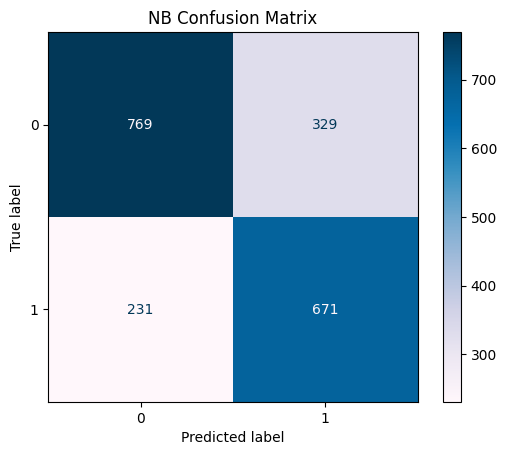

In [ ]:
#confusion matrix using matplotlib
lr_cm = confusion_matrix(anss,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=model.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('NB Confusion Matrix')
plt.show()

## Diff parameters

**XGBoost**

In [ ]:
# Create and train the XGBoost model with normalized data
model2 = xgb.XGBClassifier(reg_alpha=2.0, max_depth=2, min_child_weight=5.0,min_samples_leaf= 2,random_state=0)
model2.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=5.0, min_samples_leaf=2, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
acc2 = model2.predict(x_test)

In [ ]:
accuracy_xgb_test=accuracy_score(acc2,y_test)
precision_xgb_test=precision_score(acc2,y_test)
recall_xgb_test=recall_score(acc2,y_test)
f1_xgb_test=f1_score(acc2,y_test)

print("Testing Accuracy is ",accuracy_xgb_test)
print("Testing Precision is ",precision_xgb_test)
print("Testing recall is ",recall_xgb_test)
print("Testing F1 is ",f1_xgb_test)
print("xgb Confusion Matrix:",confusion_matrix(acc2,y_test))
class_report = classification_report(acc2, y_test)
print("Classification Report:")
print(class_report)

Testing Accuracy is  0.7335
Testing Precision is  0.694
Testing recall is  0.753528773072747
Testing F1 is  0.7225403435710568
xgb Confusion Matrix: [[773 306]
 [227 694]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.72      0.74      1079
           1       0.69      0.75      0.72       921

    accuracy                           0.73      2000
   macro avg       0.73      0.73      0.73      2000
weighted avg       0.74      0.73      0.73      2000



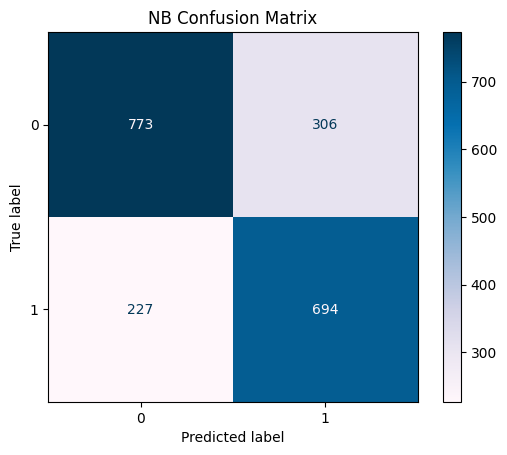

In [ ]:
#confusion matrix using matplotlib
xgb_cm = confusion_matrix(acc2,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=model2.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('NB Confusion Matrix')
plt.show()

# **XGB Using GridSearchCV**

In [ ]:
xgb = xgb.XGBClassifier(random_state=0)
# Define hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 4, 5],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 1.0]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring="accuracy", n_jobs=-1)

# Train the model with hyperparameter tuning
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [ ]:
# Get the best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:", conf_matrix)
print("Classification Report:", class_report)

Accuracy: 0.731
Confusion Matrix: [[778 222]
 [316 684]]
Classification Report:               precision    recall  f1-score   support

           0       0.71      0.78      0.74      1000
           1       0.75      0.68      0.72      1000

    accuracy                           0.73      2000
   macro avg       0.73      0.73      0.73      2000
weighted avg       0.73      0.73      0.73      2000



# MLPClassifier

In [ ]:
model3 = MLPClassifier(hidden_layer_sizes=
                       (50,),random_state=1)
model3.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(50,), random_state=1)

In [ ]:
y_pred_t = model3.predict(x_test)
acc_mlp_t  = accuracy_score(y_pred_t,y_test)
precision_mlp_t=precision_score(y_pred_t,y_test)
recall_mlp_t=recall_score(y_pred_t,y_test)
f1_mlp_t=f1_score(y_pred_t,y_test)
mlp_cm = confusion_matrix(y_pred_t,y_test)

print("Testing Accuracy is ",acc_mlp_t)
print("Testing Precision is ",precision_mlp_t)
print("Testing recall is ",recall_mlp_t)
print("Testing F1 is ",f1_mlp_t)
print("MLP Confusion Matrix",mlp_cm)

Testing Accuracy is  0.729
Testing Precision is  0.724
Testing recall is  0.7313131313131314
Testing F1 is  0.7276381909547739
MLP Confusion Matrix [[734 276]
 [266 724]]


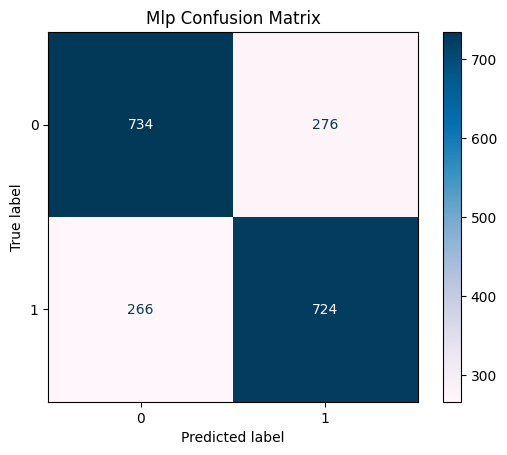

In [ ]:
#confusion matrix using matplotlib
mlp_cm = confusion_matrix(y_pred_t,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=mlp_cm, display_labels=model3.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('Mlp Confusion Matrix')
plt.show()

**SVM**

In [ ]:
classifier = svm.SVC(kernel='linear', gamma='auto', C=2, probability=True)
classifier.fit(x_train,y_train)

Y_predict = classifier.predict(x_test)

In [ ]:
print("SVM Accuracy:",accuracy_score(y_test,Y_predict))
print("SVM Precision:",precision_score(y_test,Y_predict))
print("SVM Forest Recall:",recall_score(y_test,Y_predict))
print("SVM Forest F1 Score:",f1_score(y_test,Y_predict))
print("SVM Confusion Matrix:",confusion_matrix(y_test,Y_predict))

SVM Accuracy: 0.722
SVM Precision: 0.7624113475177305
SVM Forest Recall: 0.645
SVM Forest F1 Score: 0.6988082340195017
SVM Confusion Matrix: [[799 201]
 [355 645]]


In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
svm_cm = confusion_matrix(y_test,Y_predict)
svm_cm

array([[799, 201],
       [355, 645]])

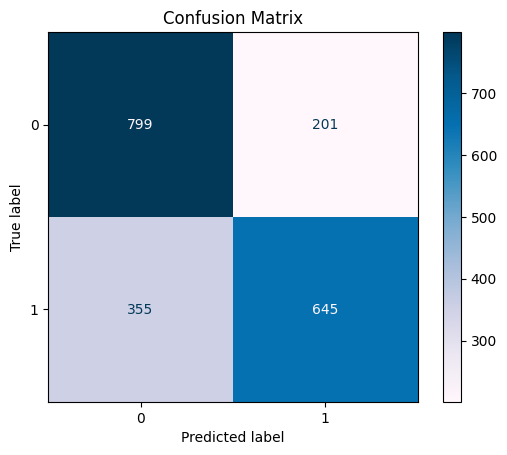

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=classifier.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# KNN


In [ ]:
#When K = 5

#KNN MODEL building

knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier = knn_classifier.fit(x_train,y_train)


#prediction

Y_predk = knn_classifier.predict(x_test)

print("KNN Accuracy:",accuracy_score(y_test,Y_predk))
print("KNN Precision:",precision_score(y_test,Y_predk))
print("KNN Recall:",recall_score(y_test,Y_predk))
print("KNN F1 Score:",f1_score(y_test,Y_predk))
print("KNN Confusion matrix:",confusion_matrix(y_test,Y_predk))

KNN Accuracy: 0.6355
KNN Precision: 0.6407061266874351
KNN Recall: 0.617
KNN F1 Score: 0.6286296484971982
KNN Confusion matrix: [[654 346]
 [383 617]]


In [ ]:
# when k = 6

knn_classifier = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
knn_classifier.fit(x_train,y_train)

#prediction
Y_pred = knn_classifier.predict(x_test)

print("KNN Accuracy:",accuracy_score(y_test,Y_pred))
print("KNN Precision:",precision_score(y_test,Y_pred))
print("KNN Forest Recall:",recall_score(y_test,Y_pred))
print("KNN Forest F1 Score:",f1_score(y_test,Y_pred))


KNN Accuracy: 0.6415
KNN Precision: 0.6925170068027211
KNN Forest Recall: 0.509
KNN Forest F1 Score: 0.5867435158501442


In [ ]:
# When k= 7

knn_classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
knn_classifier.fit(x_train,y_train)
#prediction
Y_pred = knn_classifier.predict(x_test)
print("KNN Accuracy:",accuracy_score(y_test,Y_pred))
print("KNN Precision:",precision_score(y_test,Y_pred))
print("KNN Forest Recall:",recall_score(y_test,Y_pred))
print("KNN Forest F1 Score:",f1_score(y_test,Y_pred))


KNN Accuracy: 0.64
KNN Precision: 0.6479915433403806
KNN Forest Recall: 0.613
KNN Forest F1 Score: 0.630010277492292


In [ ]:
#When k= 8


knn_classifier = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2)
knn_classifier.fit(x_train,y_train)

#prediction
Y_pred = knn_classifier.predict(x_test)

#check accuracy

print("KNN Accuracy:",accuracy_score(y_test,Y_pred))
print("KNN Precision:",precision_score(y_test,Y_pred))
print("KNN Forest Recall:",recall_score(y_test,Y_pred))
print("KNN Forest F1 Score:",f1_score(y_test,Y_pred))


KNN Accuracy: 0.6455
KNN Precision: 0.6911957950065704
KNN Forest Recall: 0.526
KNN Forest F1 Score: 0.5973878478137422


In [ ]:
# When k = 9


knn_classifier = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)
knn_classifier.fit(x_train,y_train)

#prediction
Y_pred = knn_classifier.predict(x_test)

In [ ]:
print("KNN Accuracy:",accuracy_score(y_test,Y_pred))
print("KNN Precision:",precision_score(y_test,Y_pred))
print("KNN Forest Recall:",recall_score(y_test,Y_pred))
print("KNN Forest F1 Score:",f1_score(y_test,Y_pred))


KNN Accuracy: 0.6445
KNN Precision: 0.6513089005235602
KNN Forest Recall: 0.622
KNN Forest F1 Score: 0.6363171355498721


In [ ]:
knn_cm = confusion_matrix(y_test,Y_predk)
knn_cm

array([[654, 346],
       [383, 617]])

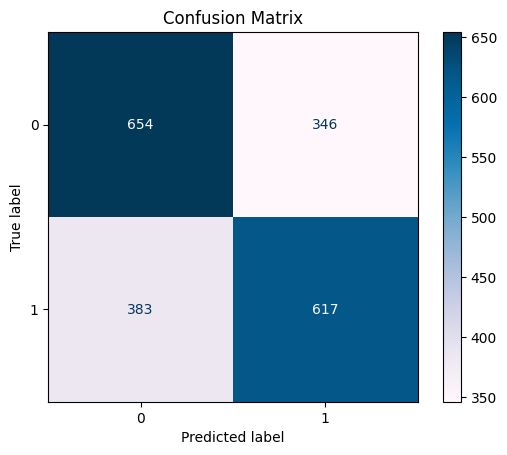

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=knn_classifier.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# KNN uisng GridSearchCV

**GB Classifier implementation**

In [ ]:
# Create the Gradient Boosting classifier
param_grid_gb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.001],
    'max_depth': [5],
    'min_samples_split': [30],
    'min_samples_leaf': [1],
    'random_state': [0]
}

# Instantiate the GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb_classifier = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)

# Train the classifier on the training data
gb_classifier.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001], 'max_depth': [5],
                         'min_samples_leaf': [1], 'min_samples_split': [30],
                         'n_estimators': [50, 100], 'random_state': [0]},
             scoring='accuracy')

In [ ]:
# Make predictions on the test data
Y_pred2 = gb_classifier.predict(x_test)

In [ ]:
print("GB Accuracy:",accuracy_score(y_test,Y_pred2))
print("GB Precision:",precision_score(y_test,Y_pred2))
print("GB Forest Recall:",recall_score(y_test,Y_pred2))
print("GB Forest F1 Score:",f1_score(y_test,Y_pred2))

GB Accuracy: 0.7335
GB Precision: 0.7693194925028836
GB Forest Recall: 0.667
GB Forest F1 Score: 0.7145152651312267


In [ ]:
#confusion matrix

cm = confusion_matrix(y_test,Y_pred2)
cm

array([[800, 200],
       [333, 667]])

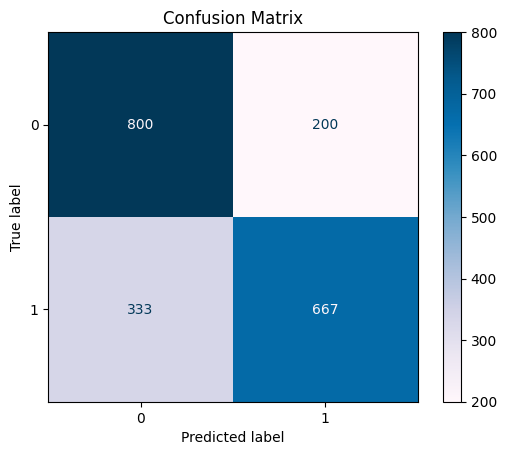

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gb_classifier.classes_)
disp.plot(cmap='PuBu', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
final_data = pd.DataFrame({'Models':['LR','RF','NB','DT','SVM','KNN','GB','MLP','XGB'],'ACC':[
    accuracy_score(anss,y_test),
    accuracy_score(y_test,rf_pred),
    accuracy_score(y_test,nb_pred),
    accuracy_score(y_test,dc_pred),
   accuracy_score(y_test, Y_predict),
   accuracy_score(y_test, Y_predk),
   accuracy_score(y_test, Y_pred2),
  accuracy_score(y_pred_t,y_test),
  accuracy_score(acc2,y_test)
                                                                                 ]})


In [ ]:
final_data

,Models,ACC
0,LR,0.7200
1,RF,0.7320
2,NB,0.5770
3,DT,0.7320
4,SVM,0.7220
5,KNN,0.6355
6,GB,0.7335
7,MLP,0.7290
8,XGB,0.7335


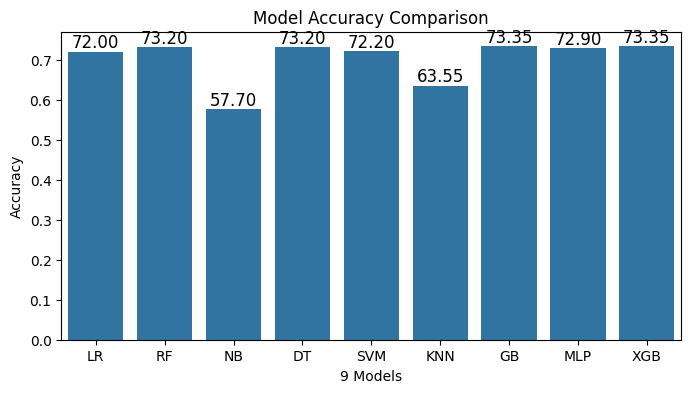

In [ ]:
# Plotting the bar chart using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
sns.barplot(x='Models', y='ACC', data=final_data)
plt.title('Model Accuracy Comparison')
plt.xlabel('9 Models')
plt.ylabel('Accuracy')
for index, row in final_data.iterrows():
    plt.text(index, row['ACC'] + 0.01, f'{row["ACC"]*100:.2f}', ha='center', fontsize=12)
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [ ]:
y_pred_prob_rf = rf_clf.predict_proba(x_test)[:, 1]
auc_roc_rf = roc_auc_score(y_test, y_pred_prob_rf)
print(f'RF AUC: {auc_roc_rf}')

RF AUC: 0.792766


In [ ]:
# Make predictions on the test set

y_pred_prob_dt = dc_clf.predict_proba(x_test)[:, 1]
y_pred_prob_nb = nb_clf.predict_proba(x_test)[:, 1]
y_pred_prob_lr = model.predict_proba(x_test)[:, 1]
y_pred_prob_xgb = model2.predict_proba(x_test)[:, 1]
y_pred_prob_mlp = model3.predict_proba(x_test)[:, 1]
y_pred_prob_knn = knn_classifier.predict_proba(x_test)[:, 1]
y_pred_prob_gb = gb_classifier.predict_proba(x_test)[:, 1]

# Calculate AUC-ROC score

auc_roc_dt = roc_auc_score(y_test, y_pred_prob_dt)
auc_roc_nb = roc_auc_score(y_test, y_pred_prob_nb)
auc_roc_LR = roc_auc_score(y_test, y_pred_prob_lr)
auc_roc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)
auc_roc_mlp = roc_auc_score(y_test, y_pred_prob_mlp)
auc_roc_knn = roc_auc_score(y_test, y_pred_prob_knn)
auc_roc_gb = roc_auc_score(y_test, y_pred_prob_gb)


print(f'DT AUC: {auc_roc_dt}')
print(f'NB AUC: {auc_roc_nb}')
print(f'LR AUC: {auc_roc_LR}')
print(f'XGB AUC: {auc_roc_xgb}')
print(f'MLP AUC: {auc_roc_mlp}')
print(f'KNN AUC: {auc_roc_knn}')
print(f'GB AUC: {auc_roc_gb}')


DT AUC: 0.7858525
NB AUC: 0.715151
LR AUC: 0.780784
XGB AUC: 0.792468
MLP AUC: 0.786928
KNN AUC: 0.6922405
GB AUC: 0.7868255


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
y_pred_prob_svm = classifier.predict_proba(x_test)[:, 1]
auc_roc_svm = roc_auc_score(y_test, y_pred_prob_svm)
print(f'SVM AUC: {auc_roc_svm}')

SVM AUC: 0.7804090000000001


# **ROC Curve**

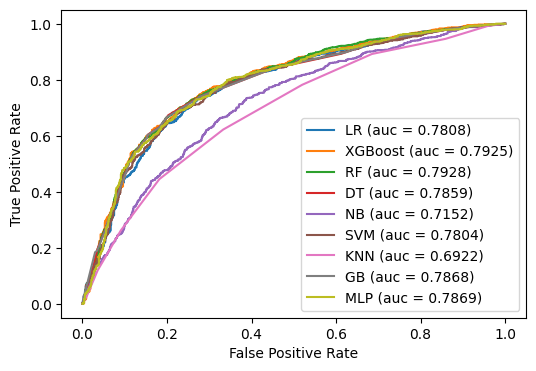

LR AUC: 0.7808
XGB AUC: 0.7925
RF AUC: 0.7928
DT AUC: 0.7859
NB AUC: 0.7152
SVM AUC: 0.7804
KNN AUC: 0.6922
GB AUC: 0.7868
MLP AUC: 0.7869


In [ ]:
#ROC
# LR
y_prob_lr = model.predict_proba(x_test)[:, 1]
lr_fpr, lr_tpr, thresholds = roc_curve(y_test, y_prob_lr)
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)

# XGBoost
y_prob_xgb = model2.predict_proba(x_test)[:, 1]
xgb_fpr, xgb_tpr, thresholds = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)

# RF
y_prob_rf = rf_clf.predict_proba(x_test)[:, 1]
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(rf_fpr, rf_tpr)

# DT
y_prob_dt = dc_clf.predict_proba(x_test)[:, 1]
dt_fpr, dt_tpr, thresholds = roc_curve(y_test, y_prob_dt)
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)


# NB
y_prob_nb = nb_clf.predict_proba(x_test)[:, 1]
nb_fpr, nb_tpr, thresholds = roc_curve(y_test, y_prob_nb)
roc_auc_nb = auc(nb_fpr, nb_tpr)

# SVM
y_prob_svm = classifier.predict_proba(x_test)[:, 1]
svm_fpr, svm_tpr, thresholds = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(svm_fpr, svm_tpr)

# KNN
y_prob_knn = knn_classifier.predict_proba(x_test)[:, 1]
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(knn_fpr, knn_tpr)

# GB
y_prob_gb = gb_classifier.predict_proba(x_test)[:, 1]
gb_fpr, gb_tpr, thresholds = roc_curve(y_test, y_prob_gb)
roc_auc_gb = auc(gb_fpr, gb_tpr)

# MLP
y_prob_mlp = model3.predict_proba(x_test)[:, 1]
mlp_fpr, mlp_tpr, thresholds = roc_curve(y_test, y_prob_mlp)
roc_auc_mlp = roc_auc_score(y_test, y_prob_mlp)

# RF
# y_prob_rf = rf_clf.predict_proba(x_test)[:, 1]
# rf_fpr, rf_tpr, thresholds = roc_curve(y_test, y_prob_rf)
# roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(6, 4))
plt.plot(lr_fpr, lr_tpr, linestyle='-', label='LR (auc = %0.4f)' % roc_auc_lr)
plt.plot(xgb_fpr, xgb_tpr, linestyle='-', label='XGBoost (auc = %0.4f)' % roc_auc_xgb)
plt.plot(rf_fpr, rf_tpr, linestyle='-', label='RF (auc = %0.4f)' % roc_auc_rf)
plt.plot(dt_fpr, dt_tpr, linestyle='-', label='DT (auc = %0.4f)' % roc_auc_dt)
plt.plot(nb_fpr, nb_tpr, linestyle='-', label='NB (auc = %0.4f)' % roc_auc_nb)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.4f)' % roc_auc_svm)
plt.plot(knn_fpr, knn_tpr, linestyle='-', label='KNN (auc = %0.4f)' % roc_auc_knn)
plt.plot(gb_fpr, gb_tpr, linestyle='-', label='GB (auc = %0.4f)' % roc_auc_gb)
plt.plot(mlp_fpr, mlp_tpr, linestyle='-', label='MLP (auc = %0.4f)' % roc_auc_mlp)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print('LR AUC: {:.4f}'.format(roc_auc_lr))
print('XGB AUC: {:.4f}'.format(roc_auc_xgb))
print('RF AUC: {:.4f}'.format(roc_auc_rf))
print('DT AUC: {:.4f}'.format(roc_auc_dt))
print('NB AUC: {:.4f}'.format(roc_auc_nb))
print('SVM AUC: {:.4f}'.format(roc_auc_svm))
print('KNN AUC: {:.4f}'.format(roc_auc_knn))
print('GB AUC: {:.4f}'.format(roc_auc_gb))
print('MLP AUC: {:.4f}'.format(roc_auc_mlp))
